# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 29 de Septiembre, 2021 23:59
</div>

Tarea realizada en colaboración con: Andrea Bellesia, Dara Meneses y Fernanda Arelle. 

In [221]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [222]:
#primero importamos SimPy y las herramientas necesarias para trabajar con cálculo simbólico
import sympy as sym

from sympy.interactive import printing #imprimes como latex 
printing.init_printing(use_latex=True)
from sympy import Symbol,Indexed,Sum

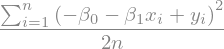

In [224]:
#ahora escribamos la función que queremos derivar (usamos la segunda forma de la función de costo)
x,y,beta0,beta1,n,i = sym.symbols('x,y,beta0,beta1,n,i') 

init_printing()

function_J= (1/(2*n)) * Sum((Indexed(y,i)-beta0-beta1*Indexed(x,i))**2,(i,1,n))
function_J

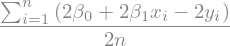

In [226]:
#luego, tomemos las derivadas parciales respecto a beta 0 y beta 1

derivada1=sym.diff(function_J, beta0)
derivada1

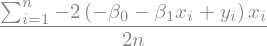

In [227]:
derivada2=sym.diff(function_J, beta1)
derivada2

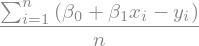

In [228]:
#notemos que para obtener el resultado deseado, solo hace falta factorizar un 2
simplify(derivada1)

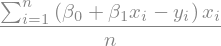

In [229]:
#haciendo lo mismo con la otra derivada:
simplify(derivada2)

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

In [230]:
e = np.loadtxt('edad.dat')
a = np.loadtxt('altura.dat')

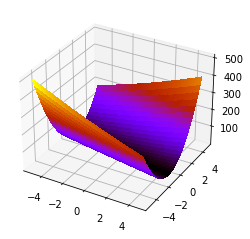

In [231]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# Obteniendo los valores de la funcion de costos (que sirva de eje Z)
def funcion_J(beta0,beta1):
    valoresJ=0
    for i in range(len(a)):
        valoresJ = valoresJ + ((a[i]-beta0-beta1*e[i])**2)/(2*len(e))
    return valoresJ

#graficando en 3D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
beta0 = np.arange(-5,5,0.25)#eje x
beta1 = np.arange(-5,5,0.25)#eje y

X, Y = np.meshgrid(beta0, beta1)
Z = funcion_J(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gnuplot,
        linewidth=0, antialiased=False)

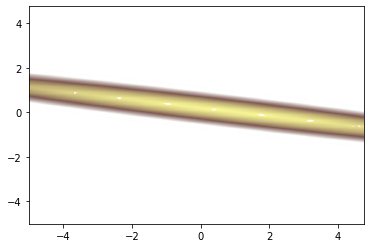

In [232]:
#ahora haciendo la gráfica de contorno
levels = np.arange(-10, 10,0.1 )
plt.contour(X,Y,Z,levels ,linewidths=4,cmap=cm.terrain)

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

In [ ]:
from ipywidgets import interact, fixed, widgets


**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

Perdóneme profe, la neta no pude con estos 3 incisos ;(

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [233]:
%cat chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

#### Tomemos la clase de regresión lineal usada en clase

In [234]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:#el tols es tu epsilon
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m 

In [235]:
import numpy as np

C = np.loadtxt('chirps.txt')
x=np.array([row[0] for row in C])
y=np.array([row[1] for row in C])

In [236]:
#entrenando la regresión lineal
r = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
r.gradientDescent(x, y)

#### graficando los datos

Text(0, 0.5, 'Temperature(F)')

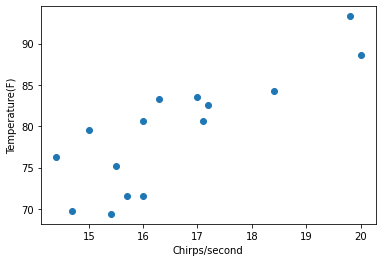

In [237]:
plt.scatter(x,y, label="data")
plt.xlabel('Chirps/second')
plt.ylabel('Temperature(F)')

In [83]:
#la gráfica de los datos coincide con la mostrada en el sitio Web

#### Ahora graficando la regresión lineal

In [238]:
import matplotlib.pyplot as plt

def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Chirps/second')
    ax[0].set_ylabel('Temperature(F)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

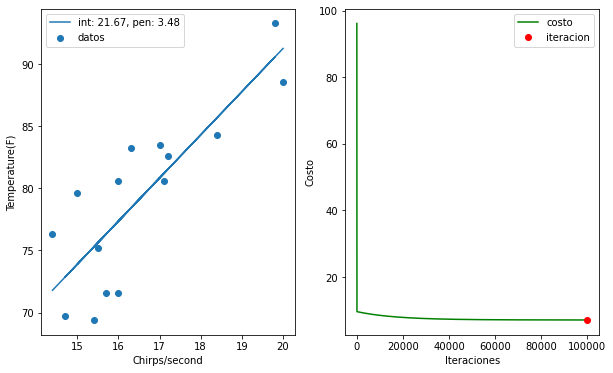

In [239]:
plotModelo(x,y,r,99999)

In [ ]:
#La gráfica va coincidiendo con lo mostrado en el sitio Web a medida que vamos aumentando las iteraciones

#En cuanto a la alfa, esta la modifiqué 'al tanteo' después de ver cómo
#una alfa muy grande no daba los resultados deseados


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [240]:
x1=np.array([10.0,8.0,13.0,9.0,11.0,14.0,6.0,4.0,12.0,7.0,5.0])
y1=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
x2=np.array([10,8,13,9,11,14,6,4,12,7,5])
y2=np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
x3=np.array([10,8,13,9,11,14,6,4,12,7,5])
y3=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
x4=np.array([8.0,8.0,8.0,8.0,8.0,8.0,8.0,19.0,8.0,8.0,8.0])
y4=np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

In [241]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:#el tols es tu epsilon
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m 

In [242]:
#calculando la regresion lineal de los 4 conjuntos de datos

r = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
r.gradientDescent(x1, y2)
r.gradientDescent(x2, y2)
r.gradientDescent(x3, y3)
r.gradientDescent(x4, y4)

La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293
La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293
La función convergió con beta: [2.94967268 0.50495371] en la iteración 12294
La función convergió con beta: [2.94895873 0.50513421] en la iteración 12294


In [ ]:
#observemos que los cuatro conjuntos de datos convergieron a prácticamente las mismas betas 

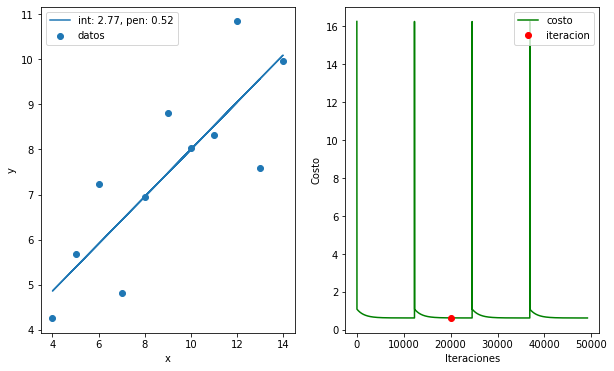

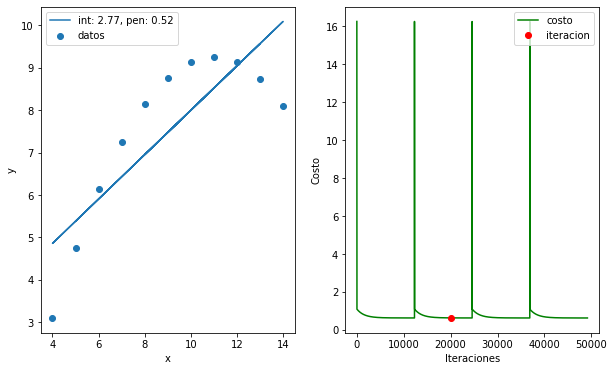

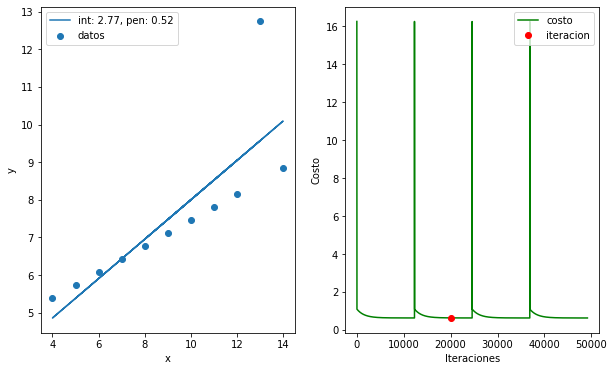

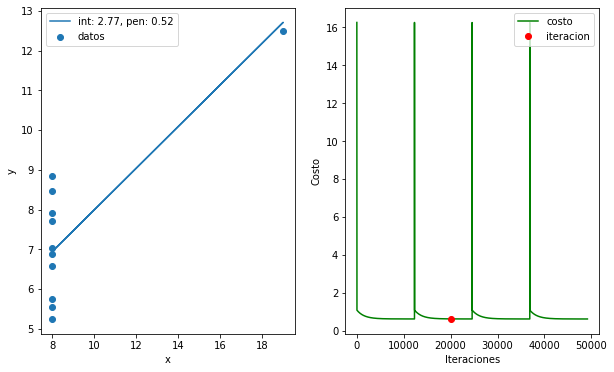

In [243]:
#graficando los 4 conjuntos de datos

def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

plotModelo(x1,y1,r,20000)
plotModelo(x2,y2,r,20000)
plotModelo(x3,y3,r,20000)
plotModelo(x4,y4,r,20000)

In [ ]:
"""
Lo que se puede concluir de ver estas cuatro gráficas es que aunque los cuatro conjuntos de datos tienen 
valores iguales para varianza y media de sus variables x,y respecticamente y aunque sus regresiones lineales 
son iguales (convergen a las mismas betas), las distribuciones y gráficas de los datos son muy 
distintas en los cuatro casos
"""

## Problema 5

Use el archivo `radioactive_decay.dat`

In [244]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

In [245]:
A = np.loadtxt('radioactive_decay.txt')

In [246]:
x=[row[0] for row in A]
y=[row[1] for row in A]

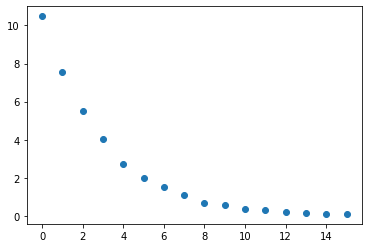

In [247]:
plt.scatter(x,y)


**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

In [248]:
#la grafica anterior se parece a e^-x, por lo que podemos transformar los datos con un logaritmo natural 
#esto no lo hacemos al tiempo
y1=[np.log(i) for i in y]
x1=x

Text(0, 0.5, 'N_remaining')

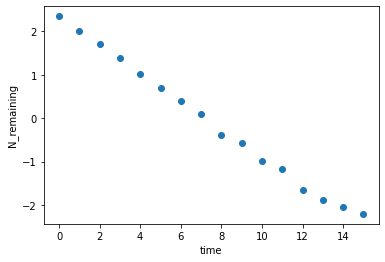

In [249]:
plt.scatter(x1,y1)
plt.xlabel('time')
plt.ylabel('N_remaining')

In [250]:
#guardando los datos transformados:
nuevos_datos=[]
for i in range(len(x1)):
    nuevos_datos.append((x1[i],y1[i]))
    
nuevos_datos=np.array(nuevos_datos)
np.savetxt('transform_radioactive_decay.txt', nuevos_datos)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [251]:
D = np.loadtxt('transform_radioactive_decay.txt')
x2=np.array([row[0] for row in D])
y2=np.array([row[1] for row in D])

In [252]:
r = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
r.gradientDescent(x2, y2)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


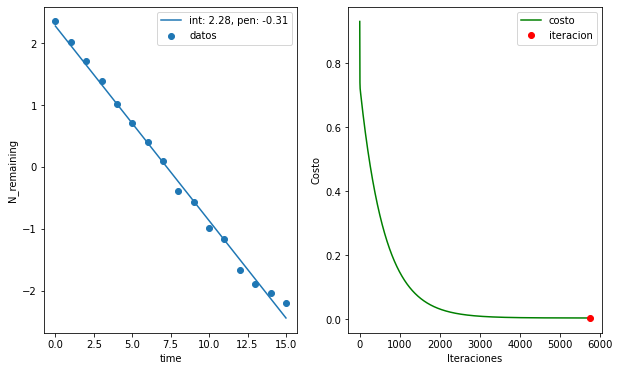

In [253]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('N_remaining')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")
    
plotModelo(x2,y2,r,5755-1)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [254]:
#los 2 valores de beta que mejor ajustan son:
r.beta

array([ 2.27548901, -0.31459673])

In [255]:
#para el espacio sin transformar
r.gradientDescent(np.array(x), np.array(y))

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


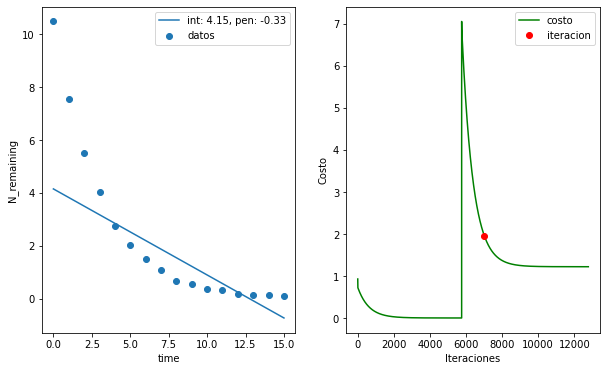

In [256]:
plotModelo(np.array(x),np.array(y),r,7016-1)

In [257]:
r.beta

array([ 6.43577297, -0.54728535])

In [ ]:
#pero notemos que es una muy mala aproximación, pues es un conjunto exponencial, 
#por lo que no hay betas que ajusten mejor al modelo